# Trabajo Practico N° 7

## Enunciado

Fecha de entrega: **14/06/2017**

Nota: la resolución de los ejercicios es individual; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código de los notebooks está permitida (por ejemplo para confeccionar gráficos).

1. Un entorno denominado **"gridworld"** consiste en un agente que se mueve en una grilla formada por un conjunto de celdas, cada una de las cuales se corresponde con un estado. En cada una de las celdas, el agente puede ejecutar una entre cuatro acciones posibles: norte, sur, este y oeste, las que producen el efecto de mover el agente hacia la celda adyacente de acuerdo a la acción ejecutada (de manera determinística). Aquella acción que lleva al agente fuera de la grilla, tiene el efecto de mantener al mismo en la misma celda, pero producen una recompensa de -1. Las demás acciones producen una recompensa de 0, excepto aquellas que mueven al agente fuera de los estados especiales denominados A y B. Desde el estado A, las cuatro acciones producen una recompensa de 10, y el efecto es que el esado siguiente siempre es A'. Lo mismo ocurre con el estado B, excepto que la recompensa es 5 y el estado siguiente es B' (Ver figura inferior a)).

![](images/Gridworld.png)

La parte b) de la figura, muestra la función de valor calculada para un agente que actúa de manera aleatoria.

1.1 Genere una gráfica que muestre la evolución del cálculo "np.sum(np.abs(world - newWorld))", para cada paso de actualización realizado hasta lograr la convergencia.

1.2 Modifique el algoritmo anterior para encontrar el valor de la política óptima. Genere una gráfica que muestre la evolución del cálculo "np.sum(np.abs(world - newWorld))", para cada paso de actualización realizado hasta lograr la convergencia.
2\. Un robot de reciclaje de residuos debe decidir, en cada instante de tiempo, si busca activamente un contenedor de residuos, si permanece en el lugar en que se encuentra a la espera de que alguien le traiga un contenedor de residuos, o bien si debe volver a su base para recargar la batería. La mejor forma de encontrar contenedores es buscarlos, pero dicha acción reduce la carga de la batería, mientras que la acción de esperar no. Por otra parte, en cualquier caso en que el robot se encuentre buscando contenedores, existe la posibilidad de que la batería se agote. En este caso, el robot se apaga y necesita ser rescatado (produciendo una recompensa muy baja). Asuma que el problema puede ser modelado de la manera que se muestra en la figura siguiente (Diagrama y función de transición de estados), en donde $R_{search}$ es el número esperado de contenedores que se espera encontrar mientras se ejecuta search, y $R_{wait}$ es el número esperado de contenedores que se espera recibir mientras se ejecuta wait, y $R_{search} > R_{wait}$.

![](images/Recycling Robot.png)

2.1 Implemente un algoritmo de Iteración de Valor para obtener la política óptima del robot de reciclaje.

2.2 Utilice el algoritmo implementado en (2.1) para evaluar cómo cambia el valor de la política óptima a partir de alterar  $\alpha$, $\beta$ para un valor de $R_{search}=5 $ y $R_{wait} = 2$. Para dicha evaluación, emplee una gráfica que permita determinar cuáles son los valores de dichas variables que maximizan el retorno esperado por el agente en cada estado. AYUDA: Varíe algoritmicamente los valores de $\alpha$ y $\beta$ y calcule la política óptima correspondiente. La gráfica debería presentar tres ejes: $\alpha$, $\beta$, y una variable que totalice los valores de los estados.

2.3 Con los mejores valores de $\alpha$ y $\beta$ obtenidos en 2.2, realice la misma operación variando $R_{search} $  con un tope de 10, manteniendo $R_{wait}$ = en 4. 

3\. Un agente debe aprender a llegar en la menor cantidad de pasos desde la posición S a la posición G en una grilla como la que sigue.

![](images/Gridworld Labyrinth.png)

Las acciones disponibles en cada estado son las mismas que las descriptas para el agente del Ejercicio 1. El efecto de una acción que llevaría al agente fuera de la grilla, es que el agente vuelve al estado S.

3.1 Plantee una función de recompensa que permita al agente aprender a lograr el objetivo expresado en 3.

3.2 Implemente un algoritmo basado en Iteración de Valor para aprender la política óptima en el entorno especificado.

3.3 Realice una gráfica que permita evaluar como cambia el valor de la política óptima en relación al factor de descuento $\gamma$.

4\. Implemente la solución de los ejercicios anteriores empleando Iteración de Política.

## Desarrollo

#### 1.1. Se genera una gráfica que muestra la evolución del cálculo "np.sum(np.abs(world - newWorld))", para cada paso de actualización realizado hasta lograr la convergencia.

Política Aleatoria
[[ 3.30902999  8.78932551  4.42765281  5.3224012   1.49221235]
 [ 1.52162172  2.9923515   2.25017358  1.90760531  0.5474363 ]
 [ 0.05085614  0.73820423  0.67314689  0.35821982 -0.40310755]
 [-0.97355865 -0.43546179 -0.35484864 -0.58557148 -1.18304148]
 [-1.8576669  -1.34519762 -1.22923364 -1.42288454 -1.97514545]]


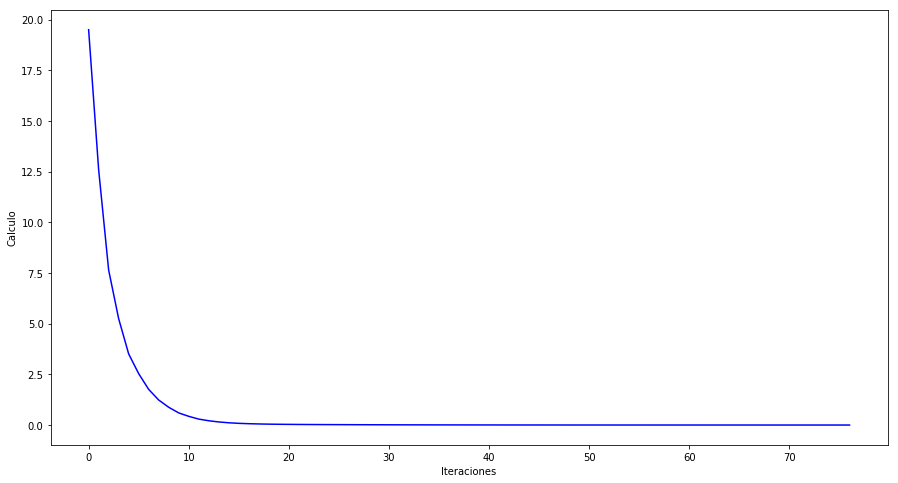

In [1]:
from __future__ import print_function
from python_utils.import_ import import_global
import numpy as np
import matplotlib.pyplot as plt

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

#Iteración de Valor
cantidad_iteraciones = 0
resultados = []
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            for action in actions:
                newPosition = nextState[i][j][action]
                # Actualización basada en Bellman
                newWorld[i, j] += actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                
    # Contamos las iteraciones para graficar
    cantidad_iteraciones = cantidad_iteraciones + 1
    # Agregamos el valor al vector
    resultados.append(np.sum(np.abs(world - newWorld)))

    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Aleatoria')
        print(newWorld)                        
        break
    world = newWorld
# Graficamos
plt.figure(figsize=(15,8))
plt.plot(np.arange(0,cantidad_iteraciones), resultados, color='blue')
plt.xlabel('Iteraciones')
plt.ylabel('Calculo')
plt.show()

#### 1.2. Se modificó el algoritmo anterior para encontrar el valor de la política óptima. Tambien se realiza la grafica para esta politica.

Política Optima
[['R' 'L' 'L' 'L' 'L']
 ['U' 'U' 'L' 'L' 'L']
 ['U' 'U' 'L' 'L' 'L']
 ['U' 'U' 'L' 'L' 'L']
 ['U' 'U' 'L' 'L' 'L']]
[[ 21.97744338  24.41938153  21.97744338  19.41938153  17.47744338]
 [ 19.77969904  21.97744338  19.77969904  17.80172914  16.02153504]
 [ 17.80172914  19.77969904  17.80172914  16.02153504  14.41938153]
 [ 16.02153504  17.80172914  16.02153504  14.41938153  12.97744338]
 [ 14.41938153  16.02153504  14.41938153  12.97744338  11.67969904]]


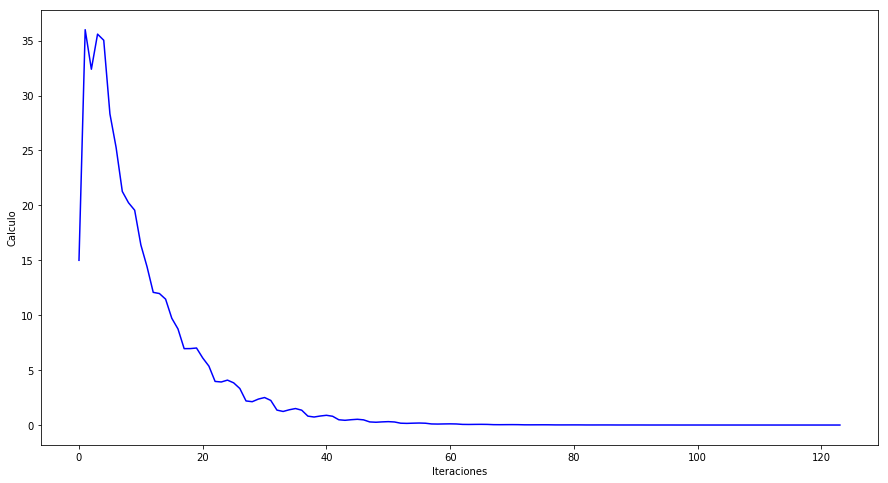

In [2]:
from __future__ import print_function
from python_utils.import_ import import_global
import numpy as np
import matplotlib.pyplot as plt

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

#Iteración de Valor
cantidad_iteraciones = 0
resultados = []
policy = np.array(range(WORLD_SIZE*WORLD_SIZE), dtype=str).reshape(WORLD_SIZE,WORLD_SIZE)
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            valores = []
            for action in actions:
                newPosition = nextState[i][j][action]
                # Guardamos el valor de la iteracion de valor en un vector
                valores.append(actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
            # Obtenemos el maximo de los valores del vector
            newWorld[i, j] = max(valores)
            if valores.index(max(valores)) == 0:
                policy[i, j] = 'L'
            if valores.index(max(valores)) == 1:
                policy[i, j] = 'U'
            if valores.index(max(valores)) == 2:
                policy[i, j] = 'R'
            if valores.index(max(valores)) == 3:
                policy[i, j] = 'D'

    # Contamos las iteraciones para graficar
    cantidad_iteraciones = cantidad_iteraciones + 1
    # Agregamos el valor al vector
    resultados.append(np.sum(np.abs(world - newWorld)))

    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Optima')
        print(policy)
        print(newWorld)
        break
    world = newWorld
# Graficamos
plt.figure(figsize=(15,8))
plt.plot(np.arange(0, cantidad_iteraciones), resultados, color='blue')
plt.xlabel('Iteraciones')
plt.ylabel('Calculo')
plt.show()


#### 2.1. Se implementa un algoritmo de Iteración de Valor para obtener la política óptima del robot de reciclaje.

Política Optima
[ 44.99972694  49.99972694]


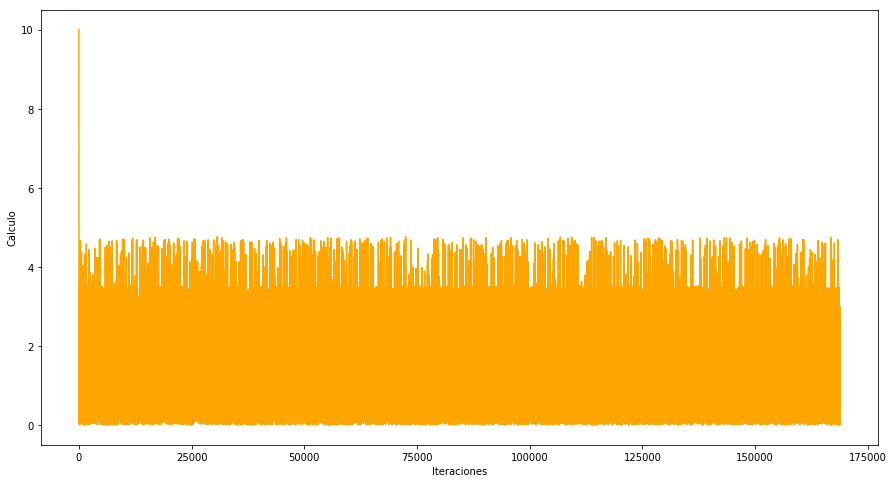

In [3]:
import random
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
WORLD_SIZE = 2
r_wait = 2
r_search = 5
alfa = 0.9
beta = 0.9
discount = 0.9

# Acciones left, up, right, down
actions = ['S', 'W', 'R']
world = np.zeros(WORLD_SIZE)

# Se setea la función de transición y la función de reward        
actionReward = dict({'S': 0, 'W': 0, 'R': 0})
def proximo_estado(state, action):
    next_state = None
    reward = None
    if state == 0:
        if action == 'R':
            next_state = 1
            reward = 0
        if action == 'W':
            next_state = 0
            reward = r_wait
        if action == 'S':
            sorteo = random.random()
            if sorteo <= beta:
                next_state = 0
                reward = r_search
            else:
                next_state = 1
                reward = -3
    else:
        if action == 'W':
            next_state = 1
            reward = r_wait
        if action == 'S':
            sorteo = random.random()
            if sorteo <= alfa:
                next_state = 1
                reward = r_search
            else:
                next_state = 0
                reward = r_search
    return next_state, reward

cantidad_iteraciones = 0
resultados = []            
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros(WORLD_SIZE)
    for i in range(0, WORLD_SIZE):
            valores = []
            for action in actions:
                if i == 0 or (i == 1 and action != 'R'):
                    newPosition, actionReward[action] = proximo_estado(i, action)
                    # Guardamos el valor de la iteracion de valor en un vector
                    valores.append((actionReward[action] + discount * world[newPosition]))
            # Obtenemos el maximo de los valores del vector
            newWorld[i] = max(valores)

    # Contamos las iteraciones para graficar
    cantidad_iteraciones = cantidad_iteraciones + 1
    # Agregamos el valor al vector
    resultados.append(np.sum(np.abs(world - newWorld)))

    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Optima')
        print(newWorld)
        break
    world = newWorld
plt.figure(figsize=(15,8))
plt.plot(np.arange(0, cantidad_iteraciones), resultados, color='orange')
plt.xlabel('Iteraciones')
plt.ylabel('Calculo')
plt.show()

#### 2.2. Se utiliza el algoritmo implementado en (2.1) para evaluar cómo cambia el valor de la política óptima a partir de alterar α, β para un valor de Rsearch=5 y Rwait=2. Para dicha evaluación, empleó una gráfica que determina cuáles son los valores de dichas variables que maximizan el retorno esperado por el agente en cada estado.

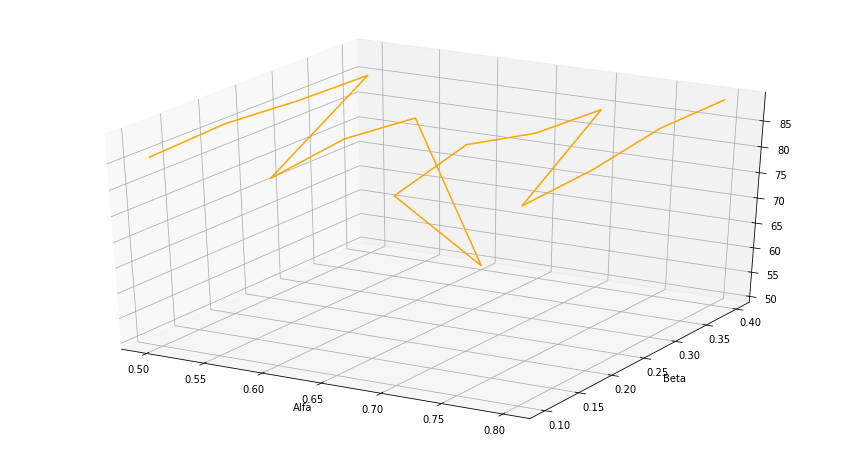

Maxima politica:  89.6042320835
Mejor alfa:  0.8
Mejor beta:  0.3


In [4]:
import random
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
WORLD_SIZE = 2
r_wait = 2
r_search = 5
discount = 0.9
alfas = []
betas = []
politicas = []

for alfa in np.arange(0.5, 0.9, 0.1):
    for beta in np.arange(0.1, 0.5, 0.1):
        # Acciones Search, Wait, Recharge
        actions = ['S', 'W', 'R']
        world = np.zeros(WORLD_SIZE)
        # Se setea la función de transición y la función de reward        
        actionReward = dict({'S': 0, 'W': 0, 'R': 0})
        def proximo_estado(state, action):
            next_state = None
            reward = None
            if state == 0:
                if action == 'R':
                    next_state = 1
                    reward = 0
                if action == 'W':
                    next_state = 0
                    reward = r_wait
                if action == 'S':
                    sorteo = random.random()
                    if sorteo <= beta:
                        next_state = 0
                        reward = r_search
                    else:
                        next_state = 1
                        reward = -3
            else:
                if action == 'W':
                    next_state = 1
                    reward = r_wait
                if action == 'S':
                    sorteo = random.random()
                    if sorteo <= alfa:
                        next_state = 1
                        reward = r_search
                    else:
                        next_state = 0
                        reward = r_search
            return next_state, reward      
        
        while True:
            # Se itera hasta lograr la convergencia
            newWorld = np.zeros(WORLD_SIZE)
            for i in range(0, WORLD_SIZE):
                    valores = []
                    for action in actions:
                        if i == 0 or (i == 1 and action != 'R'):
                            newPosition, actionReward[action] = proximo_estado(i, action)
                            # Guardamos el valor de la iteracion de valor en un vector
                            valores.append((actionReward[action] + discount * world[newPosition]))
                    # Obtenemos el maximo de los valores del vector
                    newWorld[i] = max(valores)

            if np.sum(np.abs(world - newWorld)) < 0.6:
                break
            world = newWorld
        politicas.append(np.sum(world))
        alfas.append(alfa)
        betas.append(beta)

plt.figure(figsize=(15,8))
plt.axes(projection='3d')
plt.plot(alfas, betas, politicas, color='orange')
plt.xlabel('Alfa')
plt.ylabel('Beta')
plt.show()

indice_mayor = politicas.index(max(politicas))
mejor_alfa = alfas[indice_mayor]
mejor_beta = betas[indice_mayor]

print('Maxima politica: ', max(politicas))
print('Mejor alfa: ', mejor_alfa)
print('Mejor beta: ', mejor_beta)

#### 2.3. Con los mejores valores de α y β obtenidos en 2.2, se realizo la misma operación variando Rsearch con un tope de 10, manteniendo Rwait = en 4.

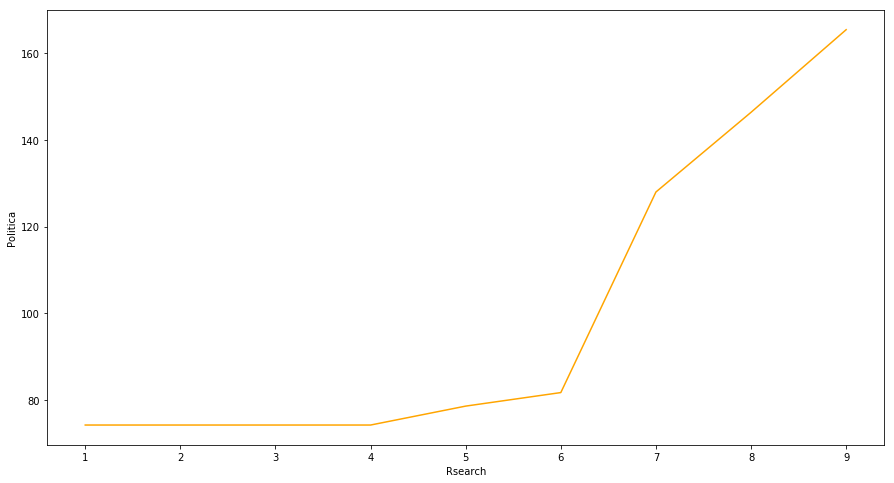

Maxima politica:  165.433097645
Mejor r_search:  9


In [5]:
WORLD_SIZE = 2
r_wait = 4
discount = 0.9
alfa = mejor_alfa
beta = mejor_beta
politicas = []
r_searchs = []
for r_search in np.arange(1, 10, 1):
    # Acciones left, up, right, down
    actions = ['S', 'W', 'R']
    world = np.zeros(WORLD_SIZE)

    # Se setea la función de transición y la función de reward        
    actionReward = dict({'S': 0, 'W': 0, 'R': 0})
    def proximo_estado(state, action):
        next_state = None
        reward = None
        if state == 0:
            if action == 'R':
                next_state = 1
                reward = 0
            if action == 'W':
                next_state = 0
                reward = r_wait
            if action == 'S':
                sorteo = random.random()
                if sorteo <= beta:
                    next_state = 0
                    reward = r_search
                else:
                    next_state = 1
                    reward = -3
        else:
            if action == 'W':
                next_state = 1
                reward = r_wait
            if action == 'S':
                sorteo = random.random()
                if sorteo <= alfa:
                    next_state = 1
                    reward = r_search
                else:
                    next_state = 0
                    reward = r_search
        return next_state, reward      

    while True:
        # Se itera hasta lograr la convergencia
        newWorld = np.zeros(WORLD_SIZE)
        for i in range(0, WORLD_SIZE):
                valores = []
                for action in actions:
                    if i == 0 or (i == 1 and action != 'R'):
                        newPosition, actionReward[action] = proximo_estado(i, action)
                        # Guardamos el valor de la iteracion de valor en un vector
                        valores.append((actionReward[action] + discount * world[newPosition]))
                # Obtenemos el maximo de los valores del vector
                newWorld[i] = max(valores)

        if np.sum(np.abs(world - newWorld)) < 0.6:
            break
        world = newWorld
    politicas.append(np.sum(world))
    r_searchs.append(r_search)

plt.figure(figsize=(15,8))
plt.plot(r_searchs, politicas, color='orange')
plt.xlabel('Rsearch')
plt.ylabel('Politica')
plt.show()
print('Maxima politica: ', max(politicas))
print('Mejor r_search: ', max(r_searchs))

#### 3.1. Se plantea una función de recompensa que permita al agente aprender a lograr llegar a la posicion G en la menor cantidad de pasos.

Política Aleatoria
[[ -9.92540477  -8.79686924  -7.72220233  -7.80155116]
 [ -8.79686924  -5.96688617  -2.23971812  -0.43207864]
 [ -7.72220233  -2.23971812   8.61336119  23.60399566]
 [ -7.80155116  -0.43207864  23.60399566  99.9870993 ]]


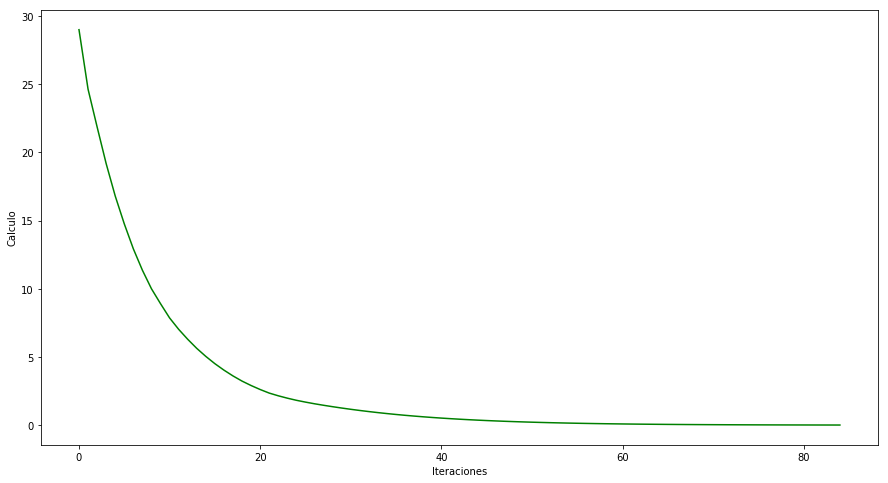

In [6]:
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
G_POS = [3, 3]
S_POS = [0, 0]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = S_POS
            reward['U'] = -2.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = -1.0

        if i == WORLD_SIZE - 1:
            next['D'] = S_POS
            reward['D'] = -2.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = -1.0

        if j == 0:
            next['L'] = S_POS
            reward['L'] = -2.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = -1.0

        if j == WORLD_SIZE - 1:
            next['R'] = S_POS
            reward['R'] = -2.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = -1.0
        # Arriba del goal
        if [i, j] == [G_POS[0] - 1, G_POS[1]]:
            next['D'] = G_POS
            reward['D'] = 10.0
        # A la izquierda del goal
        if [i, j] == [G_POS[0], G_POS[1] - 1]:
            next['R'] = G_POS
            reward['R'] = 10.0
        # Llego al goal
        if [i, j] == G_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = G_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0
            
        nextState[i].append(next)
        actionReward[i].append(reward)
        
#Iteración de Valor
cantidad_iteraciones = 0
resultados = []
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            for action in actions:
                newPosition = nextState[i][j][action]
                # Actualización basada en Bellman
                newWorld[i, j] += actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
    
    # Contamos las iteraciones para graficar
    cantidad_iteraciones = cantidad_iteraciones + 1
    # Agregamos el valor al vector
    resultados.append(np.sum(np.abs(world - newWorld)))

    if np.sum(np.abs(world - newWorld)) < 1e-2:
        print('Política Aleatoria')
        print(newWorld)
        break
    world = newWorld
# Graficamos
plt.figure(figsize=(15,8))
plt.plot(np.arange(0,cantidad_iteraciones), resultados, color='green')
plt.xlabel('Iteraciones')
plt.ylabel('Calculo')
plt.show()

#### 3.2. Se  implementa un algoritmo basado en Iteración de Valor para aprender la política óptima en el entorno especificado.

Política Optima
[['R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'G']]
[[ 54.95384615  62.17094615  70.18994615  79.09994615]
 [ 62.17094615  70.18994615  79.09994615  88.99994615]
 [ 70.18994615  79.09994615  88.99994615  99.99994615]
 [ 79.09994615  88.99994615  99.99994615  99.99994615]]


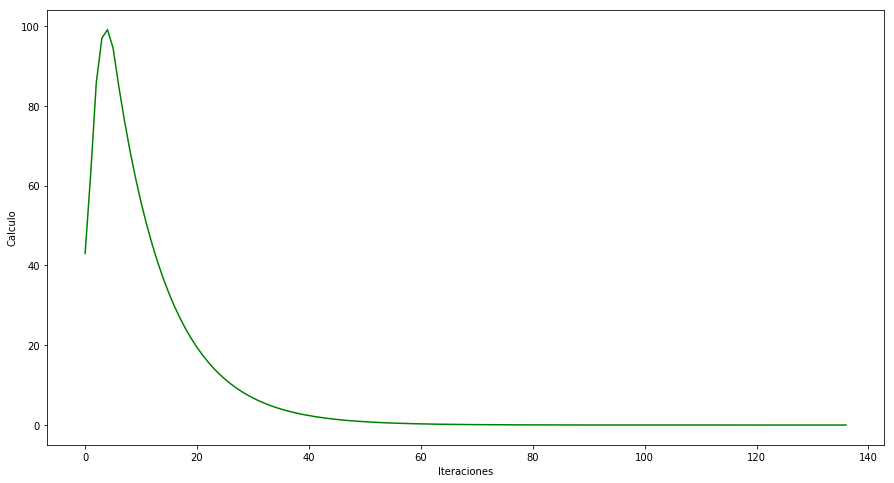

In [7]:
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
G_POS = [3, 3]
S_POS = [0, 0]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = S_POS
            reward['U'] = -2.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = -1.0

        if i == WORLD_SIZE - 1:
            next['D'] = S_POS
            reward['D'] = -2.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = -1.0

        if j == 0:
            next['L'] = S_POS
            reward['L'] = -2.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = -1.0

        if j == WORLD_SIZE - 1:
            next['R'] = S_POS
            reward['R'] = -2.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = -1.0
        # Arriba del goal
        if [i, j] == [G_POS[0] - 1, G_POS[1]]:
            next['D'] = G_POS
            reward['D'] = 10.0
        # A la izquierda del goal
        if [i, j] == [G_POS[0], G_POS[1] - 1]:
            next['R'] = G_POS
            reward['R'] = 10.0
        # Llego al goal
        if [i, j] == G_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = G_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0
            
        nextState[i].append(next)
        actionReward[i].append(reward)

#Iteración de Valor
cantidad_iteraciones = 0
resultados = []
policy = np.array(range(WORLD_SIZE*WORLD_SIZE), dtype=str).reshape(WORLD_SIZE,WORLD_SIZE)
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            valores = []
            for action in actions:
                newPosition = nextState[i][j][action]
                # Guardamos el valor de la iteracion de valor en un vector
                valores.append(actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
            # Obtenemos el maximo de los valores del vector
            newWorld[i, j] = max(valores)
            if valores.index(max(valores)) == 0:
                policy[i, j] = 'L'
            if valores.index(max(valores)) == 1:
                policy[i, j] = 'U'
            if valores.index(max(valores)) == 2:
                policy[i, j] = 'R'
            if valores.index(max(valores)) == 3:
                policy[i, j] = 'D'
    # Contamos las iteraciones para graficar
    cantidad_iteraciones = cantidad_iteraciones + 1
    # Agregamos el valor al vector
    resultados.append(np.sum(np.abs(world - newWorld)))

    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Optima')
        policy[WORLD_SIZE - 1, WORLD_SIZE - 1] = 'G'
        print(policy)        
        print(newWorld)
        break
    world = newWorld
# Graficamos
plt.figure(figsize=(15,8))
plt.plot(np.arange(0, cantidad_iteraciones), resultados, color='green')
plt.xlabel('Iteraciones')
plt.ylabel('Calculo')
plt.show()

#### 3.3. Se realiza una gráfica que permita evaluar como cambia el valor de la política óptima en relación al factor de descuento γ.

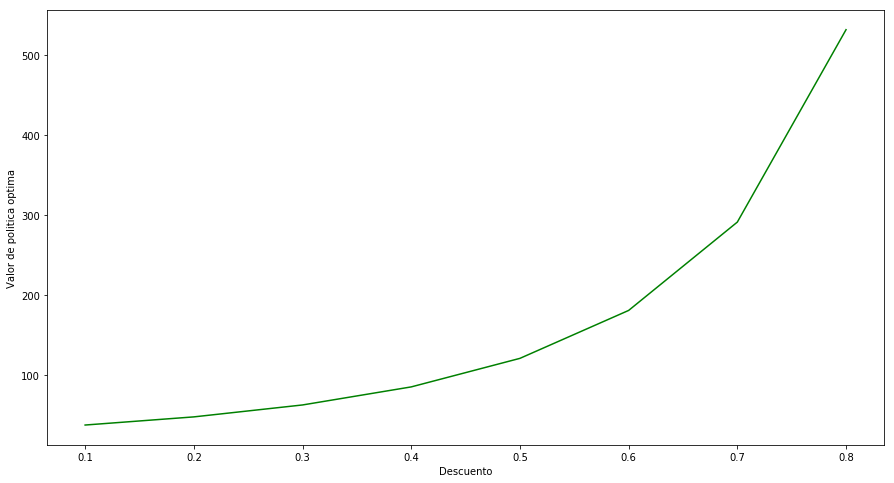

In [8]:
import numpy as np
from python_utils.import_ import import_global
import matplotlib.pyplot as plt
# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
G_POS = [3, 3]
S_POS = [0, 0]

    
world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0
        # Arriba del goal
        if [i, j] == [G_POS[0] - 1, G_POS[1]]:
            next['D'] = G_POS
            reward['D'] = 10.0
        # A la izquierda del goal
        if [i, j] == [G_POS[0], G_POS[1] - 1]:
            next['R'] = G_POS
            reward['R'] = 10.0
        # Llego al goal
        if [i, j] == G_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = G_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        nextState[i].append(next)
        actionReward[i].append(reward)

# Iteracion de valor
valores_optimos = []
descuentos = []
for discount in np.arange(0.1, 0.9, 0.1):
    while True:
        # Se itera hasta lograr la convergencia
        newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
        for i in range(0, WORLD_SIZE):
            for j in range(0, WORLD_SIZE):
                valores = []
                for action in actions:
                    newPosition = nextState[i][j][action]
                    # Guardamos el valor de la iteracion de valor en un vector
                    valores.append(actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                # Obtenemos el maximo de los valores del vector
                newWorld[i, j] = max(valores)

        if np.sum(np.abs(world - newWorld)) < 1e-4:
            descuentos.append(discount)
            valores_optimos.append(np.sum(np.abs(newWorld)))
            break
        world = newWorld
plt.figure(figsize=(15,8))
plt.xlabel('Descuento')
plt.ylabel('Valor de politica optima')
plt.plot(descuentos, valores_optimos, color='green')
plt.show()

#### 4. Se implementa la solución de los ejercicios anteriores empleando Iteración de Política.

Para el ejercicio 1.1:

In [9]:
import numpy as np
from python_utils.import_ import import_global

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se setea la función de transición y la función de reward
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

# Seteamos la politica
policy = np.array(range(25), dtype=str).reshape(WORLD_SIZE,WORLD_SIZE)
policy[:] = 'D'

is_value_changed = True
iterations = 0
while is_value_changed:
    is_value_changed = False
    iterations += 1
    # corre la iteración de valor para cada estado
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            newPosition = nextState[i][j][policy[i, j]]
            newWorld[i, j] = actionReward[i][j][policy[i, j]] + discount * world[newPosition[0], newPosition[1]]
    # realiza la mejora de la política
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            q_best = newWorld[i, j]
            q_sa = 0
            for action in actions:
                newPosition = nextState[i][j][action]
                q_sa = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]
                if q_sa > q_best:
                    policy[i, j] = action
                    q_best = q_sa
                    is_value_changed = True
                    world = newWorld
    print ("Iteracion:", iterations)
print ("Política Final")
print (policy)
print (world)

Iteracion: 1
Iteracion: 2
Iteracion: 3
Iteracion: 4
Iteracion: 5
Iteracion: 6
Iteracion: 7
Política Final
[['R' 'L' 'L' 'D' 'L']
 ['R' 'U' 'L' 'U' 'L']
 ['R' 'U' 'L' 'U' 'L']
 ['U' 'U' 'L' 'L' 'U']
 ['U' 'U' 'L' 'U' 'L']]
[[ 9.       9.40951  9.       8.645    7.7805 ]
 [ 7.50951  9.       7.50951  7.7805   3.45951]
 [ 7.29     7.50951  7.29     3.45951  3.645  ]
 [ 5.97051  7.29     5.97051  3.645    3.2805 ]
 [-0.59049  5.97051  0.       3.2805   0.     ]]


Para el ejercicio 2.1

In [10]:
import numpy as np

states = [0,1]
# S, W, R 
actions = [0,1,2]
N_STATES = len(states)
N_ACTIONS = len(actions)
P = np.zeros((N_STATES, N_ACTIONS, N_STATES))  # Probabilidades de Transición
R = np.zeros((N_STATES, N_ACTIONS, N_STATES))  # Rewards
alfa = 0.9
beta = 0.9

# Estado 0
P[0,2,1] = 1
P[0,1,0] = 1
P[0,0,0] = beta
P[0,0,1] = 1-beta

# Estado 1
P[1,1,1] = 1
P[1,0,1] = alfa
P[1,0,0] = 1-alfa

# Estado 0
R[0,2,1] = 0
R[0,1,0] = r_wait
R[0,0,0] = r_search
R[0,0,1] = -3

# Estado 1
R[1,1,1] = r_wait
R[1,0,1] = r_search
R[1,0,0] = r_search
# factor de descuento
gamma = 0.75

# inicializa la política y la función de valor
policy = [0 for s in range(N_STATES)]
V = np.zeros(N_STATES)

print("Política Inicial")
print(V)
print(policy)

is_value_changed = True
iterations = 0
while is_value_changed:
    is_value_changed = False
    iterations += 1
    # corre la iteración de valor para cada estado 
    for s in range(N_STATES):
        V[s] = sum([P[s,policy[s],s1] * (R[s,policy[s],s1] + gamma*V[s1]) for s1 in range(N_STATES)])
        
    # realiza la mejora de la política
    for s in range(N_STATES):
        q_best = V[s]
        for a in range(N_ACTIONS):
            q_sa = sum([P[s, a, s1] * (R[s, a, s1] + gamma * V[s1]) for s1 in range(N_STATES)])
            if q_sa > q_best:
                print("State", s, ": q_sa", q_sa, "q_best", q_best)
                policy[s] = a
                q_best = q_sa
                is_value_changed = True

    print ("Iteracion:", iterations)

print ("Política Final")
# Traducimos las acciones
for i in range(0, len(policy)):
    if policy[i] == 0:
        policy[i] = 'S'
    if policy[i] == 1:
        policy[i] = 'W'
    if policy[i] == 2:
        policy[i] = 'R' 
print (policy)
print (V)

Política Inicial
[ 0.  0.]
[0, 0]
State 0 : q_sa 13.783875 q_best 7.8
State 1 : q_sa 16.054875 q_best 9.585
Iteracion: 1
State 0 : q_sa 18.3418905469 q_best 13.783875
State 1 : q_sa 21.1737649219 q_best 16.503665625
Iteracion: 2
State 0 : q_sa 21.7944473257 q_best 18.3418905469
State 1 : q_sa 24.8986826503 q_best 21.5156160879
Iteracion: 3
State 0 : q_sa 24.3980737755 q_best 21.7944473257
State 1 : q_sa 27.6159800253 q_best 25.1576244088
Iteracion: 4
State 0 : q_sa 26.3545436992 q_best 24.3980737755
State 1 : q_sa 29.6024506393 q_best 27.8112520091
Iteracion: 5
State 0 : q_sa 27.8205059382 q_best 26.3545436992
State 1 : q_sa 31.0572912488 q_best 29.7491858836
Iteracion: 6
State 0 : q_sa 28.9163843895 q_best 27.8205059382
State 1 : q_sa 32.1244238767 q_best 31.1672384168
Iteracion: 7
State 0 : q_sa 29.73405557 q_best 28.9163843895
State 1 : q_sa 32.9081937926 q_best 32.2066147605
Iteracion: 8
State 0 : q_sa 30.3432014446 q_best 29.73405557
State 1 : q_sa 33.4844795812 q_best 32.96951913

Para el ejercicio 3.1

In [11]:
import numpy as np
from python_utils.import_ import import_global

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
G_POS = [3, 3]
S_POS = [0, 0]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se setea la función de transición y la función de reward    
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = S_POS
            reward['U'] = -2.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = -1.0

        if i == WORLD_SIZE - 1:
            next['D'] = S_POS
            reward['D'] = -2.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = -1.0

        if j == 0:
            next['L'] = S_POS
            reward['L'] = -2.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = -1.0

        if j == WORLD_SIZE - 1:
            next['R'] = S_POS
            reward['R'] = -2.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = -1.0
        # Arriba del goal
        if [i, j] == [G_POS[0] - 1, G_POS[1]]:
            next['D'] = G_POS
            reward['D'] = 10.0
        # A la izquierda del goal
        if [i, j] == [G_POS[0], G_POS[1] - 1]:
            next['R'] = G_POS
            reward['R'] = 10.0
        # Llego al goal
        if [i, j] == G_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = G_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0
            
        nextState[i].append(next)
        actionReward[i].append(reward)

# Seteamos la politica
policy = np.array(range(16), dtype=str).reshape(WORLD_SIZE,WORLD_SIZE)
policy[:] = 'D'

is_value_changed = True
iterations = 0
while is_value_changed:
    is_value_changed = False
    iterations += 1
    # corre la iteración de valor para cada estado
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            newPosition = nextState[i][j][policy[i, j]]
            newWorld[i, j] = actionReward[i][j][policy[i, j]] + discount * world[newPosition[0], newPosition[1]]
            
    # realiza la mejora de la política
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            q_best = newWorld[i, j]
            q_sa = 0
            for action in actions:
                newPosition = nextState[i][j][action]
                q_sa = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]
                if q_sa > q_best:
                    #print("State", 'i:', i, 'j:', j,  "q_sa", q_sa, "q_best", q_best)
                    policy[i, j] = action
                    q_best = q_sa
                    is_value_changed = True
                    world = newWorld
    print ("Iteracion:", iterations)
print ("Política Final")
print (policy)
print (world)

Iteracion: 1
Iteracion: 2
Iteracion: 3
Iteracion: 4
Iteracion: 5
Iteracion: 6
Iteracion: 7
Política Final
[['D' 'R' 'R' 'D']
 ['R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'L']]
[[ -5.27608   9.0269   17.0459   25.9559 ]
 [  9.0269   17.0459   25.9559   35.8559 ]
 [ 17.0459   25.9559   35.8559   46.8559 ]
 [ 25.9559   35.8559   46.8559   46.8559 ]]
